In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append('..')

In [78]:
import torchvision
import torch as T
import torch.nn as nn
import numpy as np

import utils as ut

In [30]:
img = ut.load_img('https://www.vettedpetcare.com/vetted-blog/wp-content/uploads/2018/08/How-To-Travel-With-a-Super-Anxious-Cat-square.jpeg')
img = img.unsqueeze(0).float() / 255

torch.Size([1, 3, 900, 900])

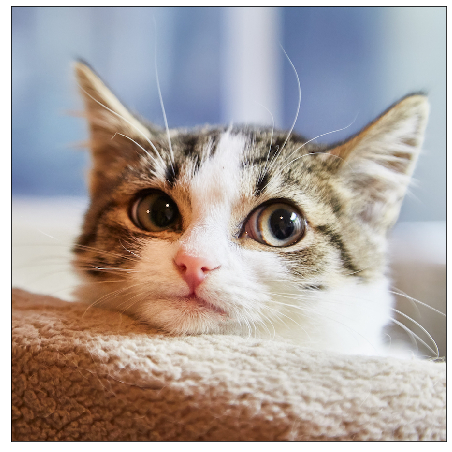

In [32]:
ut.vis.imshow(img)
img.shape

In [33]:
import kornia

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


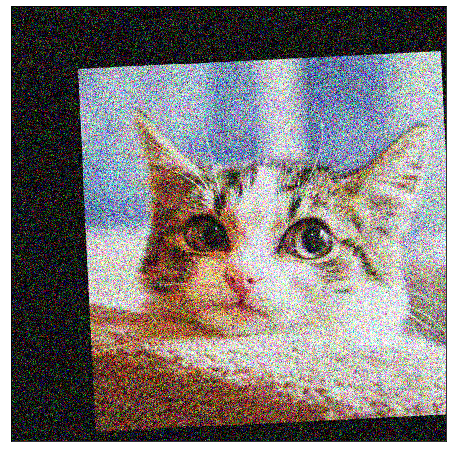

In [234]:
i = img

offsets = T.randn(1, 2) * i.shape[-1] * 0.05
angles = T.randn(1) * 10
scales = T.randn(1) / 5 + 1
noise = T.randn_like(i) / 4

i = kornia.scale(i, scales)
i = kornia.rotate(i, angles)
i = kornia.translate(i, offsets)

i = i + noise

i.imshow()

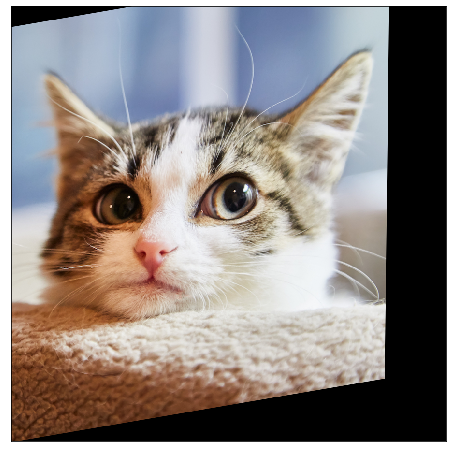

In [25]:
img.shape, angles

(torch.Size([1, 3, 900, 900]), tensor([-0.9011]))

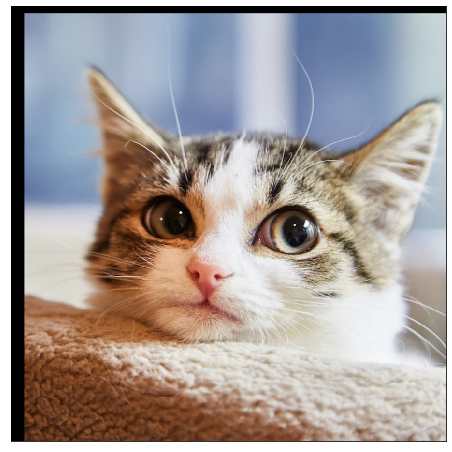